# Imports

In [1]:
import numpy as np
from tensorflow import keras
import pandas as pd

# Loading Dataset

get the dataset from the below link


https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [2]:
df = pd.read_csv("data/diabetes.csv")

# Task Description

<b>Description about the task</b>

Deep Learning Task:
- Numeric Data Type
- Supervised Task
- Classification

<b>Steps to be Performed</b>

EDA:
- Explore Data
- Analyse It
- Visualise if needed (90% of the time)

Pre-Processing:
- Normalise 

# EDA

In [3]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Normalise Data

In [4]:
normal_df = pd.DataFrame()

In [5]:
# Normalise data to (0-1 range) by dividing with the maximum values possible.

# Maximum Pregnancies can be greater thaan 17 some times. So dividing with 70.
normal_df["Pregnancies"] = df["Pregnancies"]/20

# Maximum glucode level is 199. So dividing with 200.
normal_df["Glucose"] = df["Glucose"]/200


normal_df["BloodPressure"] = df["BloodPressure"]/122
normal_df["SkinThickness"] = df["SkinThickness"]/99
normal_df["Insulin"] = df["Insulin"]/850

# Highest BMI in data is 67. Dividing with 70 to support variations in data in the future. 
normal_df["BMI"] = df["BMI"]/70
normal_df["DiabetesPedigreeFunction"] = df["DiabetesPedigreeFunction"]/2.5
# Maximum age of subjects in the experiment is 81. But in general max age can be 100 also.
normal_df["Age"] = df["Age"]/100

# Adding Outcome as-it-is.
normal_df["Outcome"] = df["Outcome"]

In [6]:
normal_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0         0.30    0.740       0.590164       0.353535  0.000000  0.480000   
1         0.05    0.425       0.540984       0.292929  0.000000  0.380000   
2         0.40    0.915       0.524590       0.000000  0.000000  0.332857   
3         0.05    0.445       0.540984       0.232323  0.110588  0.401429   
4         0.00    0.685       0.327869       0.353535  0.197647  0.615714   

   DiabetesPedigreeFunction   Age  Outcome  
0                    0.2508  0.50        1  
1                    0.1404  0.31        0  
2                    0.2688  0.32        1  
3                    0.0668  0.21        0  
4                    0.9152  0.33        1

In [7]:
normal_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.192253    0.604473       0.566438       0.207439    0.093882   
std       0.168479    0.159863       0.158654       0.161134    0.135581   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.050000    0.495000       0.508197       0.000000    0.000000   
50%       0.150000    0.585000       0.590164       0.232323    0.035882   
75%       0.300000    0.701250       0.655738       0.323232    0.149706   
max       0.850000    0.995000       1.000000       1.000000    0.995294   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.457037                  0.188751    0.332409    0.348958  
std      0.112631                  0.132531    0.117602    0.476951  
min      0.000000                  0.031200    0.210000    0.000000  
25%      0.390000                  0.097500    0.240000    0.000000  
50%      0.457143                  0.149000    0.290000    0.000000  
75%      0.522857                  0.250500    0.410000    1.000000  
max      0.958571                  0.968000    0.810000    1.000000

# Creating X and y

In [8]:
X = normal_df.drop("Outcome", axis=1)
y = normal_df["Outcome"]

In [9]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0         0.30    0.740       0.590164       0.353535  0.000000  0.480000   
1         0.05    0.425       0.540984       0.292929  0.000000  0.380000   
2         0.40    0.915       0.524590       0.000000  0.000000  0.332857   
3         0.05    0.445       0.540984       0.232323  0.110588  0.401429   
4         0.00    0.685       0.327869       0.353535  0.197647  0.615714   

   DiabetesPedigreeFunction   Age  
0                    0.2508  0.50  
1                    0.1404  0.31  
2                    0.2688  0.32  
3                    0.0668  0.21  
4                    0.9152  0.33

In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
print(X.shape, y.shape)

(768, 8) (768,)


# Building Model

Creating a Simple Neural Network with 4 layers

In [12]:
model = keras.Sequential()
model.add(keras.Input(shape=(8,)))
model.add(keras.layers.Dense(16, activation=keras.activations.relu))
model.add(keras.layers.Dense(8, activation=keras.activations.relu))
model.add(keras.layers.Dense(4, activation=keras.activations.relu))
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

In [13]:
model.compile(optimizer = keras.optimizers.Adam(), 
              loss = keras.losses.BinaryCrossentropy(), 
              metrics=["accuracy"])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [15]:
# model.fit() is used for training the model

# mode._hist is the vairable which tracks all the properties of model for every epoch

model_hist = model.fit(X, y, epochs=50, batch_size=10)

Epoch 1/50
77/77 [==============================] - 2s 3ms/step - loss: 0.6909 - accuracy: 0.5300
Epoch 2/50
77/77 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.6953
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6985
Epoch 4/50
77/77 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.7202
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7263
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7409
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.7402
Epoch 8/50
77/77 [==============================] - 0s 3ms/step - loss: 0.6250 - accuracy: 0.7440
Epoch 9/50
77/77 [==============================] - 0s 3ms/step - loss: 0.6094 - accuracy: 0.7624
Epoch 10/50
77/77 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.7609
Epoch 11/50
77/77 [

## Plotting Models performance over every epoch durinf Training

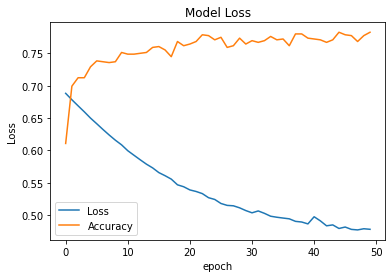

In [16]:
from matplotlib import pyplot as plt

plt.plot(model_hist.history['loss'], label="Loss")
plt.plot(model_hist.history['accuracy'], label="Accuracy")

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')

plt.legend()
plt.show()

# Evaluation

## Manual Checking of predictions

In [17]:
# Printing Prediction for random sample

i = 22
pred = model.predict([list(normal_df.iloc[i,:-1])])

print("Prediction :", pred)
print("Actual Value:", normal_df.iloc[i,-1])

Prediction : [[0.9289912]]
Actual Value: 1


In [18]:
# Printing Model output (Predictions) and comparing them with
# some actual labels (ground_truth labels) in the data.

for i in [9, 44, 75, 89]:
    pred = model.predict([list(normal_df.iloc[i,:-1])])
    print("{}: Prediction : {}".format(i, pred))
    print("{}: Actual Value : {}".format(i, normal_df.iloc[i,-1]))

9: Prediction : [[0.16584015]]
9: Actual Value : 1
44: Prediction : [[0.6987294]]
44: Actual Value : 0
75: Prediction : [[0.16584015]]
75: Actual Value : 0
89: Prediction : [[0.16584015]]
89: Actual Value : 0


In [19]:
# The model gives a value between 0 and 1
# We have to apply a threshold value and classify the range into either 0 or 1

# for example, we can take threshold as 0.5 and if score is <0.5 it's class 0. else it's class 1


## Applying Threshold and converting to 0's and 1's

In [20]:
threshold = 0.5

y_pred = []

for i in model.predict(X):
    y_pred.append((0 if i[0]<threshold else 1))

In [21]:
y_true = normal_df["Outcome"].to_list()

## Printing Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_true, y_pred))

[[435  65]
 [104 164]]


## Classification Report

In [23]:
from sklearn.metrics import classification_report

target_names = ['Normal', 'Diabetic']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.81      0.87      0.84       500
    Diabetic       0.72      0.61      0.66       268

    accuracy                           0.78       768
   macro avg       0.76      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



Observing the macro-avg of f1 score,
We can say that our model is performing 75% accurately